# 斑点检测

对处理过的图像进行局部最大值检测的常见程序称为斑点检测。它通常应用于高斯差分（DoG）、高斯拉普拉斯（LoG）和黑塞矩阵行列式（DoH）图像。我们将使用[scikit-image](https://scikit-image.org)函数来实现这一点。这些方法的优势在于无需预处理，这是内置的。

另请参阅
* [斑点检测（scikit-image教程）](https://scikit-image.org/docs/stable/auto_examples/features_detection/plot_blob.html)
* [斑点检测和跟踪（视频）](https://www.youtube.com/watch?v=q6-NsNvu81w)

In [1]:
from skimage.feature import blob_dog, blob_log, blob_doh

import pyclesperanto_prototype as cle
from skimage.io import imread, imshow
from skimage.filters import gaussian 
import matplotlib.pyplot as plt

我们首先加载一张图像并裁剪一个区域用于演示目的。我们使用了图像集[BBBC007v1](https://bbbc.broadinstitute.org/BBBC007)第1版（Jones等人，Proc. ICCV Workshop on Computer Vision for Biomedical Image Applications，2005），该图像集可从Broad Bioimage Benchmark Collection获得[Ljosa等人，Nature Methods，2012]。

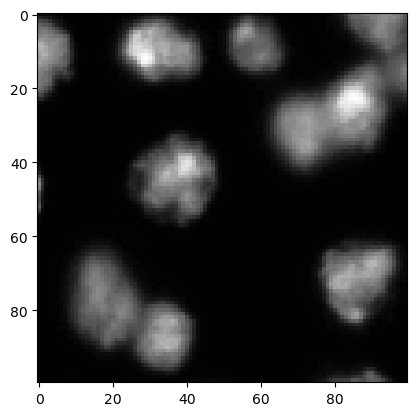

In [2]:
image = imread("../../data/BBBC007_batch/A9 p7d.tif")[-100:, 0:100]

cle.imshow(image)

由于技术原因，首先必须转换此图像的像素类型（[参见此讨论](https://forum.image.sc/t/how-to-use-scikit-images-blob-dog/75150)）和[此GitHub问题](https://github.com/scikit-image/scikit-image/issues/6657)。

In [3]:
image = image.astype(float)

## 高斯差分（DoG）

DoG技术包括对图像应用两次高斯模糊操作。将得到的图像相互减去，得到一个图像，其中小于和大于定义大小或`sigma`范围的对象被移除。在这个图像中，检测局部最大值。在[`blob_dog`](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.blob_dog)的文档中阅读更多信息。

In [4]:
coordinates_dog = blob_dog(image, min_sigma=1, max_sigma=10, threshold=1)
coordinates_dog

array([[10.    , 30.    ,  4.096 ],
       [24.    , 85.    ,  4.096 ],
       [42.    , 39.    ,  4.096 ],
       [11.    ,  0.    ,  4.096 ],
       [87.    , 35.    ,  4.096 ],
       [71.    , 85.    ,  4.096 ],
       [32.    , 71.    ,  4.096 ],
       [46.    ,  0.    ,  1.    ],
       [ 9.    , 58.    ,  4.096 ],
       [78.    , 18.    ,  6.5536],
       [81.    , 85.    ,  1.6   ],
       [99.    , 90.    ,  2.56  ],
       [ 0.    , 99.    ,  6.5536],
       [51.    , 41.    ,  1.6   ],
       [52.    ,  0.    ,  1.    ],
       [16.    , 99.    ,  1.6   ],
       [99.    , 81.    ,  1.6   ],
       [41.    , 27.    ,  1.    ],
       [34.    , 37.    ,  1.    ],
       [16.    ,  8.    ,  1.    ],
       [46.    , 25.    ,  1.    ],
       [99.    , 49.    ,  1.    ],
       [99.    , 45.    ,  1.    ]])

In [5]:
coordinates_dog.shape

(23, 3)

这个数组包含x和y坐标以及对应最大值的sigma。我们可以提取坐标列表并将其可视化。

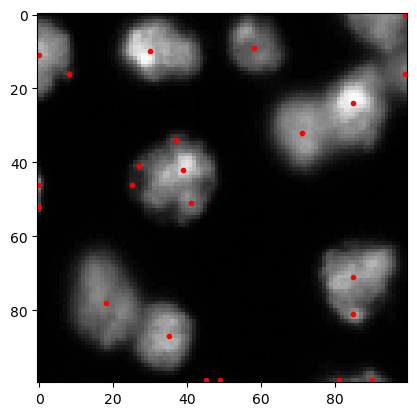

In [6]:
cle.imshow(image, continue_drawing=True)
plt.plot(coordinates_dog[:, 1], coordinates_dog[:, 0], 'r.')

## 高斯拉普拉斯（LoG）
LoG技术是对高斯模糊图像应用拉普拉斯核。在得到的图像中，可以更容易地检测给定大小的对象，因为噪声已被移除，边缘得到增强。

In [7]:
coordinates_log = blob_log(image, min_sigma=1, max_sigma=10, num_sigma=10, threshold=1)
coordinates_log

array([[10., 30.,  5.],
       [23., 85.,  4.],
       [43., 38.,  6.],
       [11.,  0.,  6.],
       [71., 85.,  6.],
       [87., 35.,  5.],
       [ 9., 58.,  5.],
       [46.,  0.,  1.],
       [77., 17.,  7.],
       [81., 85.,  2.],
       [99., 90.,  3.],
       [ 0., 99.,  8.],
       [51., 41.,  2.],
       [52.,  0.,  1.],
       [16., 99.,  3.],
       [87., 19.,  2.],
       [99., 81.,  2.],
       [41., 27.,  1.],
       [34., 36.,  1.],
       [56., 38.,  1.],
       [17.,  8.,  1.],
       [46., 25.,  1.],
       [35., 44.,  1.],
       [56., 33.,  1.],
       [62., 83.,  1.],
       [99., 49.,  2.],
       [99., 45.,  1.],
       [82., 95.,  1.],
       [99., 42.,  1.]])

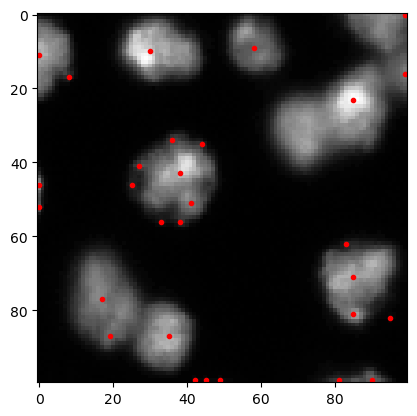

In [8]:
cle.imshow(image, continue_drawing=True)
plt.plot(coordinates_log[:, 1], coordinates_log[:, 0], 'r.')

## 黑塞矩阵行列式（DoH）

这种方法通过确定原始图像的高斯模糊图像的黑塞矩阵行列式图像中的最大值来工作（[阅读更多](https://scikit-image.org/docs/stable/api/skimage.feature.html#skimage.feature.blob_doh)）。

In [9]:
coordinates_doh = blob_doh(image, min_sigma=1, max_sigma=10, num_sigma=10, threshold=1)
coordinates_doh

array([[25., 85., 10.],
       [43., 37., 10.],
       [86., 34.,  8.],
       [71., 85., 10.],
       [ 0., 30., 10.],
       [31., 70.,  9.],
       [ 0., 77., 10.],
       [76., 16., 10.],
       [ 0., 57.,  9.],
       [ 1., 93.,  5.],
       [97., 89.,  3.],
       [ 0., 44.,  6.],
       [71., 29.,  9.],
       [ 0.,  0.,  9.],
       [19., 16., 10.],
       [95., 22.,  9.],
       [62.,  0., 10.],
       [92.,  0., 10.],
       [28., 50., 10.],
       [41., 81.,  9.],
       [30., 25., 10.],
       [59., 72., 10.],
       [43., 58., 10.],
       [85., 95.,  9.],
       [88., 74., 10.],
       [17., 34.,  5.],
       [74., 45., 10.],
       [98., 84.,  1.],
       [53., 11., 10.],
       [99., 43.,  9.],
       [35., 98.,  9.],
       [58., 49.,  9.],
       [57., 99.,  9.],
       [10., 99.,  7.],
       [57., 34.,  3.],
       [32.,  0., 10.]])

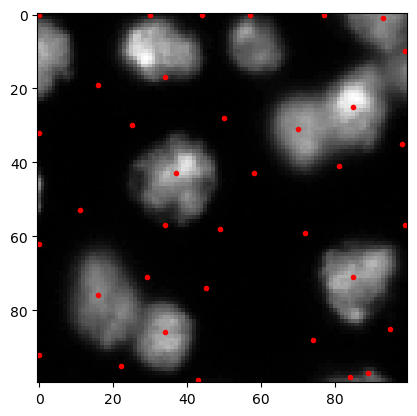

In [10]:
cle.imshow(image, continue_drawing=True)
plt.plot(coordinates_doh[:, 1], coordinates_doh[:, 0], 'r.')